# Closed CO2

In [1]:
#input constant
KH=10^-1.5; Ka1=10^-6.3; Ka2=10^-10.3; Ka3 =10^-9.74;pCO2=10^-3.5; Kw=10^-14; Ksp_CaOH2=5.5*10^-6; Ksp_CaCO3=4.8*10^-9; Ca_molmass=40.08;

## 1. Solubility of Ca(OH)2

$$[Ca(OH)_2]=Ca^{2+}+2OH^-$$

The solubility product constant

$$K_{sp}=[Ca^{2+}]{[OH^-]}^2=5.5*10^{-6}$$

if $[Ca^{2+}]=x$, $[OH^-]=2x$,
then,
$$K_{sp}=x*(2x)^2=4x^3=5.5*10^{-6}$$

### Solve

In [2]:
x=(Ksp_CaOH2/4)^(1/3)
OH_CaOH2=2*x
H_CaOH2=Kw/OH_CaOH2
pH_CaOH2=-log10(H_CaOH2)

x = 0.011120


OH_CaOH2 = 0.022240


H_CaOH2 = 4.4964e-13


pH_CaOH2 = 12.347


so the solubility of Ca(OH)2 is 0.0111 mol/L, pH=12.347

## 2. Predicted pH in open system

$$[H_2CO_3]=K_H*{pCO_2}$$

$$[HCO_3^-]=\frac{K_{a1}[H_2CO_3]}{[H^+]}=\frac{K_{a1}*K_H*pCO_2}{[H^+]}$$

$$[CO_3^{2-}]=\frac{K_{a2}[HCO_3^-]}{[H^+]}=\frac{K_{a2}\frac{K_{a1}*K_H*pCO_2}{[H^+]}}{[H^+]}=\frac{K_{a2}*K_{a1}*K_H*pCO_2}{[H^+]^2}$$

$$[OH^-]=\frac{K_w}{[H^+]}$$

$$2[Ca^{2+}]+[H^+]=[OH^-]+[HCO_3^-]+2[CO_3^{2-}]$$

$$[Ca^{2+}]=\frac{[OH^-]+[HCO_3^-]+2[CO_3^{2-}]-[H^+]}{2}$$

For Ca,

$$[Ca^{2+}]=\frac{K_{sp, CaCO_3}}{[CO_3^2-]}=\frac{K_{sp, CaCO_3}*[H^+]^2}{K_{a2}*K_{a1}*K_H*pCO_2}$$

$$2[Ca^{2+}]+[H^+]=[OH^-]+[HCO_3^-]+2[CO_3^{2-}]$$

$$2*\frac{K_{sp, CaCO_3}*[H^+]^2}{K_{a2}*K_{a1}*K_H*pCO_2}+[H^+]=\frac{K_w}{[H^+]}+\frac{K_{a1}*K_H*pCO_2}{[H^+]}+2*\frac{K_{a2}*K_{a1}*K_H*pCO_2}{[H^+]^2}$$

$$2*\frac{K_{sp, CaCO_3}*[H^+]^4}{K_{a2}*K_{a1}*K_H*pCO_2}+[H^+]^3-{K_w}*{[H^+]}-K_{a1}*K_H*pCO_2*[H^+]-2*K_{a2}*K_{a1}*K_H*pCO_2=0$$

In [3]:
% for open system when balanced

a=2*Ksp_CaCO3/(Ka2*Ka1*KH*pCO2);
b=1;
c=-(Kw+Ka1*KH*pCO2);
d=-2*Ka2*Ka1*KH*pCO2;

H0=roots([a b c d]);
H0=H0(imag(H0)==0&H0>0);
pH0=-log10(H0);
disp(pH0)

11.625


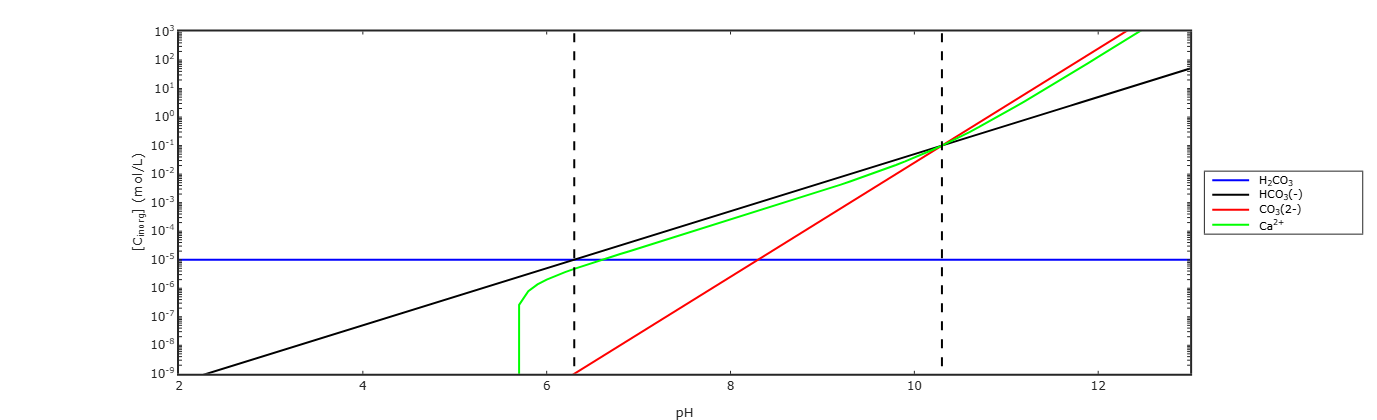

    __plt__>__plt2vv__ at line 501 column 10
    __plt__>__plt2__ at line 247 column 14
    __plt__ at line 114 column 16
    semilogy at line 65 column 10

    legend at line 306 column 8

    __plt__>__plt2vv__ at line 501 column 10
    __plt__>__plt2__ at line 247 column 14
    __plt__ at line 114 column 16
    semilogy at line 65 column 10

    __plt__>__plt2vv__ at line 501 column 10
    __plt__>__plt2__ at line 247 column 14
    __plt__ at line 114 column 16
    semilogy at line 65 column 10

    __plt__>__plt2vv__ at line 501 column 10
    __plt__>__plt2__ at line 247 column 14
    __plt__ at line 114 column 16
    semilogy at line 65 column 10

    __plt__>__plt2vv__ at line 501 column 10
    __plt__>__plt2__ at line 247 column 14
    __plt__ at line 114 column 16
    semilogy at line 65 column 10



In [4]:
graphics_toolkit ("plotly");

pH=2:0.1:13; 
H=10.^-pH; 
HCO3=(Ka1*KH*pCO2)./H;  
CO3=(Ka2*Ka1*KH*pCO2)./(H.^2); 
H2CO3=ones(size(pH)).*(KH*pCO2); 
Ca=(CO3+HCO3+Kw./(H)-H)/2;

h1=semilogy(pH,H2CO3,'b-','linewidth',2);
hold on
h2=semilogy(pH,HCO3,'k-','linewidth',2);
h3=semilogy(pH,CO3,'r-','linewidth',2);
h4=semilogy(pH,Ca,'g-','linewidth',2);
xlabel('pH'); ylabel('[C_{inorg}] (mol/L)')
legend('H_2CO_3','HCO_3(-)','CO_3(2-)','Ca^{2+}','location','eastoutside')
legend ("autoupdate", "off");
set(gca,'linewidth',2,'fontsize',12)

semilogy([-log10(Ka1) -log10(Ka1)],[1e-10 1e3],'k--','linewidth',2)
semilogy([-log10(Ka2) -log10(Ka2)],[1e-10 1e3],'k--','linewidth',2)

axis([2 13 1e-9 1e3])

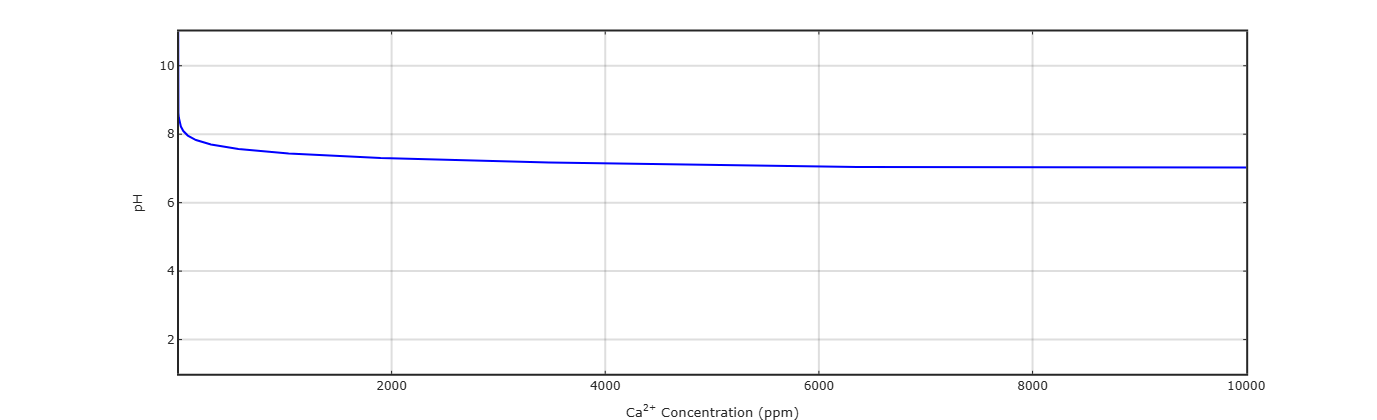

In [5]:
graphics_toolkit ("plotly");

H=logspace(-14, -1, 100);

H2CO3=KH*pCO2;
HCO3=(Ka1*H2CO3)./H;
CO3=(Ka2*HCO3)./H;
OH=Kw./H;

Ca=Ksp_CaCO3./CO3;
pH=-log10(H);

figure;
h1=plot(Ca*1000*Ca_molmass, pH, 'b-', 'LineWidth', 2);
xlabel('Ca^{2+} Concentration (ppm)');
ylabel('pH');
set(gca,'linewidth',2,'fontsize',12);
axis([10 10000 1 11])
grid on;


Ca_measured,1,2,3,4,5,6,7,8,9,10
1,0.015,0.169,0.171,0.181,0.0152,0.0101,0.008,0.0026,0.0023,0.0019


Measured Ca²⁺ (mol/L) and Predicted Open-System pH:
   1.5000e-02   9.6238e+00
   1.6900e-01   1.0331e+01
   1.7100e-01   1.0334e+01
   1.8100e-01   1.0348e+01
   1.5200e-02   9.6282e+00
   1.0100e-02   9.4880e+00
   8.0000e-03   9.4049e+00
   2.6000e-03   8.9759e+00
   2.3000e-03   8.9267e+00
   1.9000e-03   8.8493e+00


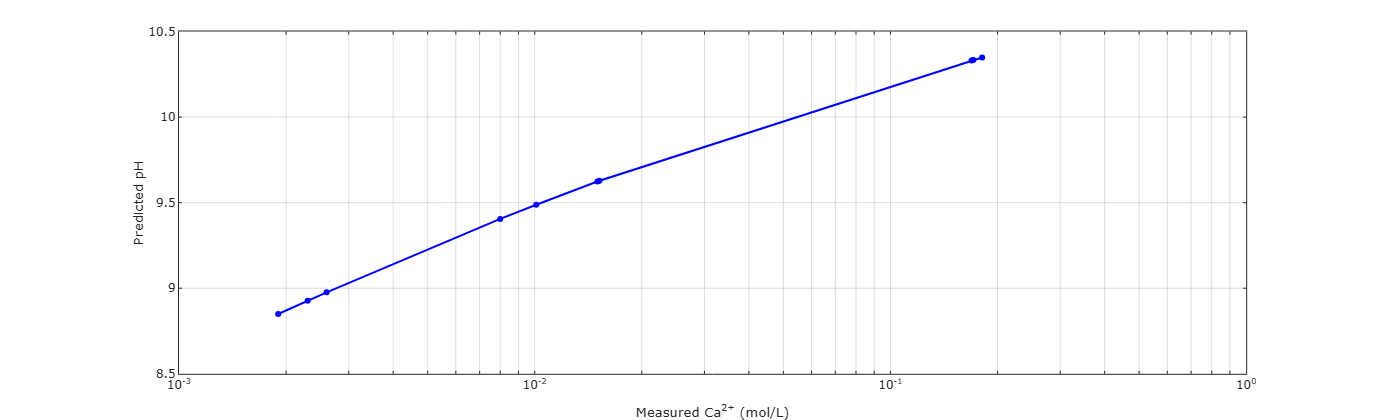

In [6]:
% For measured data

Ca_measured = [0.015,0.169,0.171,0.181,0.0152,0.0101,0.0080,0.0026,0.0023,0.0019]
pH_predicted = nan(size(Ca_measured));

for i = 1:length(Ca_measured)
    Ca = Ca_measured(i);

    charge_balance = @(H) (2 * Ca + H - ...
                          (Ka1 * H2CO3) / H - ...
                          (2 * Ka1 * Ka2 * H2CO3) / H^2 - ...
                          Kw / H);
    try
        H_initial_guess = 10^-12; 
        H_solution = fzero(charge_balance, H_initial_guess);
        pH_predicted(i) = -log10(H_solution);
    catch
        pH_predicted(i) = NaN; % Assign NaN if the solver fails
    end
end

disp("Measured Ca²⁺ (mol/L) and Predicted Open-System pH:");
disp([Ca_measured' pH_predicted']);

figure;
semilogx(Ca_measured, pH_predicted, 'bo-', 'linewidth', 2);
xlabel('Measured Ca^{2+} (mol/L)');
ylabel('Predicted pH');
title('Predicted pH in Open System vs Measured Ca^{2+}');
set(gca, 'fontsize', 12);
grid on;

## 3. Predicted pH in closed system

$$C_T=[H_2CO_3]+[HCO_3^-]+[CO_3^{2-}]$$

For HCO3,

$$C_T=\frac{[H^+][HCO_3^-]}{K_{a1}}+[HCO_3^-]+\frac{K_{a2}[HCO_3^-]}{[H^+]}$$

$$[{HCO}_3^-]=\frac{K_{a1}*H*C_T}{H^2+K_{a1}*H + K_{a1}*K_{a2}}$$

For CO3,

$$[CO_3^{2-}]=\frac{K_{a2}[HCO_3^-]}{[H^+]}=\frac{K_{a1}*K_{a2}*C_T}{H^2+K_{a1}*H + K_{a1}*K_{a2}}$$

For Ca,

$$2[Ca^{2+}]+[H^+]=[OH^-]+[HCO_3^-]+2[CO_3^{2-}]$$

Set CT as 2*10-4 mol/L (the CT at time zero in our cement experiment Test B is around 10 mg/L) 

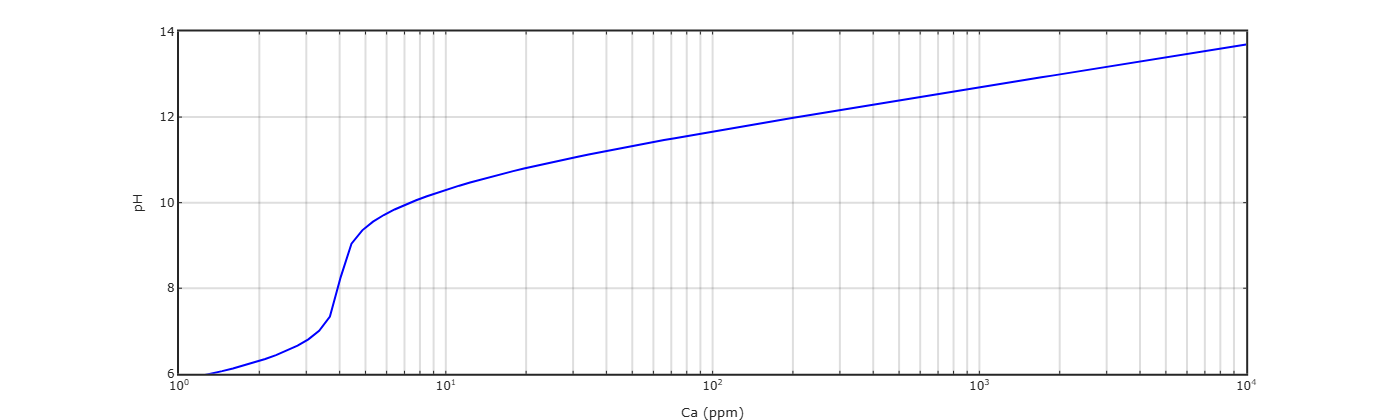

In [7]:
#for closed system
%input constant
KH=10^-1.5; Ka1=10^-6.3; Ka2=10^-10.3; Ka3 =10^-9.74;pCO2=10^-3.5; Kw=10^-14; Ksp_CaOH2=5.5*10^-6; Ksp_CaCO3=4.8*10^-9; Ca_molmass=40.08;
CT=2e-4;

Ca_ppm=logspace(0,4,100);
Ca_mol_L=Ca_ppm/(1000*Ca_molmass);

a=ones(size(Ca_mol_L));
b=Ka1+2*Ca_mol_L;
c=Ka1*Ka2+2*Ca_mol_L*Ka1-Kw-Ka1*CT;
d=2*Ca_mol_L*Ka1*Ka2-Kw*Ka1-2*Ka1*Ka2*CT;
e=-Kw*Ka1*Ka2*ones(size(Ca_mol_L));

pH=nan(size(Ca_mol_L));

for i = 1:length(Ca_mol_L)
    coeffs = [a(i), b(i), c(i), d(i), e(i)];
    H_roots = roots(coeffs); 
    H_filtered = H_roots(imag(H_roots) == 0 & H_roots > 0);
    
    if ~isempty(H_filtered)
        pH(i) = -log10(min(H_filtered));
    end
end

% Plot pH vs Calcium Concentration
figure;
semilogx(Ca_ppm, pH, 'b-', 'linewidth', 2);
xlabel('Ca (ppm)');
ylabel('pH');
set(gca, 'linewidth', 2, 'fontsize', 12);
grid on;
axis([1 10000 6 14]);
